In [ ]:
import torch
from torch import nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [12]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_ones = torch.ones_like(x_np)
x_rand = torch.rand_like(x_ones, dtype=torch.float16)
x_rand

tensor([[0.5088, 0.9414],
        [0.5830, 0.9536]], dtype=torch.float16)

In [41]:
X, y = make_classification(n_samples=5000, n_features=30, random_state=42, n_classes=4, n_informative=18)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float16)
X_test = torch.tensor(X_test, dtype=torch.float16)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [85]:
class SimpleClassifier(nn.Module):
    def __init__(self, hidden_dim=4, num_class=4, input_dim=30):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim, dtype=torch.float16),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_class, dtype=torch.float16)
        )
    
    def forward(self, x):
        return self.net(x)

In [89]:
epochs=10
batch_size=5000
lr=0.0001

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_dl, test_dl = DataLoader(train_dataset, batch_size=batch_size), DataLoader(test_dataset, batch_size=batch_size)

In [90]:
torch.autograd.set_detect_anomaly(True)

model = SimpleClassifier(input_dim=X_test.shape[1])
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=lr)

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_dl:
        optimizer.zero_grad()
        pred = model(xb)
        batch_loss = loss(pred, yb)
        batch_loss.backward()
        optimizer.step()
        total_loss+=batch_loss.item()
    avg_loss = total_loss / X_train.shape[1]

    val_loss = 0
    model.train(False)
    with torch.no_grad():
        for xb, yb in test_dl:
            pred = model(xb)
            batch_loss = loss(pred, yb)
            val_loss += batch_loss.item()
    
    ang_val = val_loss / X_test.shape[1]
    print(f"Epoch {epoch+1}: loss={avg_loss:.4f} | val_loss={ang_val:.4f}")


Epoch 1: loss=0.0466 | val_loss=0.0466
Epoch 2: loss=0.0466 | val_loss=0.0466
Epoch 3: loss=0.0466 | val_loss=0.0466
Epoch 4: loss=0.0466 | val_loss=0.0466
Epoch 5: loss=0.0466 | val_loss=0.0466
Epoch 6: loss=0.0466 | val_loss=0.0466
Epoch 7: loss=0.0466 | val_loss=0.0466
Epoch 8: loss=0.0466 | val_loss=0.0466
Epoch 9: loss=0.0466 | val_loss=0.0466
Epoch 10: loss=0.0466 | val_loss=0.0466


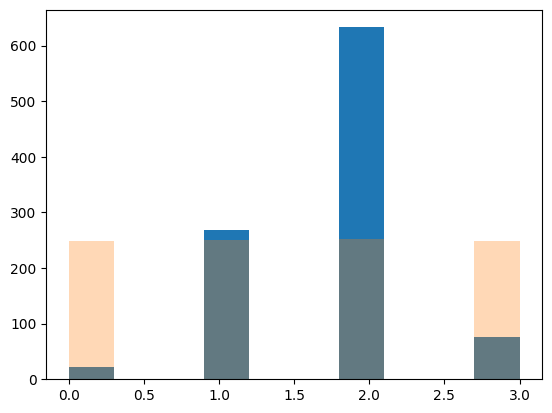

0.278

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

pred_labels = model(X_test).argmax(dim=1)
plt.hist(pred_labels)
plt.hist(y_test, alpha=0.3)
plt.show()
accuracy_score(y_test, pred_labels)